# Lab 1a: Classification with a single-layer perceptron
Perceptron and Delta Rule learning

All the imports you need for this lab:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## Classification with a single-layer perceptron

### Generation of the data

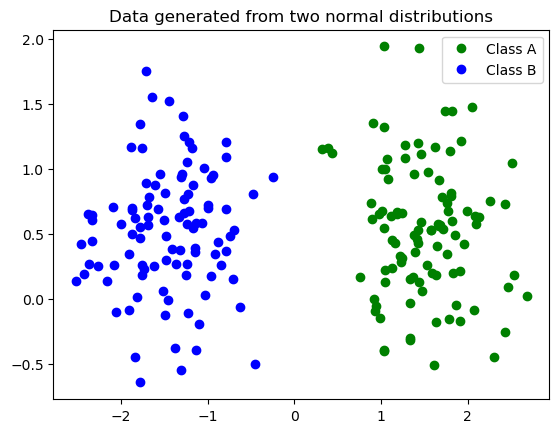

In [2]:
N = 100
# Used to generate the data
median_A = [1.5, 0.5]
sigma_A = 0.5

median_B = [-1.5, 0.5]
sigma_B = 0.5

# Generate the classes
classA = np.zeros(shape=(2,N))
classB = np.zeros(shape=(2,N))

# X and Y values for the classes
classA[0] = np.random.normal(loc=median_A[0], scale=sigma_A, size=N)
classA[1] = np.random.normal(loc=median_A[1], scale=sigma_A, size=N)

classB[0] = np.random.normal(loc=median_B[0], scale=sigma_B, size=N)
classB[1] = np.random.normal(loc=median_B[1], scale=sigma_B, size=N)

# Plot the data
plt.plot(classA[0], classA[1], 'go')
plt.plot(classB[0], classB[1], 'bo')
plt.legend(['Class A', 'Class B'])
plt.title("Data generated from two normal distributions")
plt.show()

### Classification with a single layer perceptron and analysis



In [3]:
# Combine the data
dataset = np.concatenate((classA, classB), axis=1)

# Adding a bias term
bias = np.ones((1, 2 * N))
dataset = np.concatenate((bias, dataset), axis=0)

# Creating target labels
target = np.concatenate((np.ones(N), -np.ones(N)))

# Shuffling the data
shuffled_indices = np.random.permutation(dataset.shape[1])
np.random.shuffle(shuffled_indices)
dataset = dataset[:, shuffled_indices]
target = target[shuffled_indices]

# Creating the weight and bias vectors
weights =np.random.randn(1, 3)

In [4]:
# Sequential delta rule algorithm
def delta_rule(data, labels, weights, eta, epochs):
    # Implement the delta rule
    init_weights = weights
    error_list = []
    for epoch in range(epochs):
        error = init_weights.dot(data) - labels
        correction = -eta * error.dot(data.T)
        init_weights += correction
        # Mean squared error
        error_list.append(np.mean(np.square(error)))
    return init_weights, error_list


# Implement the perceptron learning algorithm
def perceptron_learning(data, labels, weights, eta, epochs=100):
    error_list = []
    for epoch in range(epochs):
        predicted_labels = weights.dot(data)
        for i in range(np.shape(predicted_labels)[1]):
            # If false positive -> decrease weights
            if predicted_labels[0, i] >= 0 and labels[i] < 0:
                weights -= eta * data[:, i]

            # If false negative -> increase weights
            if predicted_labels[0, i] < 0 and labels[i] > 0:
                weights += eta * data[:, i]

        # Calculate the error
        error = labels - predicted_labels
        # Mean squared error
        error_list.append(np.mean(np.square(error)))
    updated_weights = weights
    return updated_weights, error_list

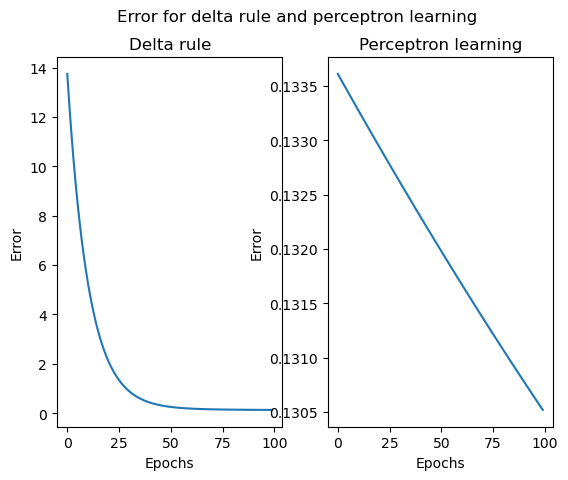

In [5]:
# Data for the delta rule
eta = 0.0001
epochs = 100
updated_w, error_list = delta_rule(dataset, target, weights, eta, epochs)

# Data for the perceptron learning algorithm
w_p, error_list_p = perceptron_learning(dataset, target, weights, eta, epochs)

# Plot the error with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Error for delta rule and perceptron learning")
ax1.plot(error_list)
ax1.set_title("Delta rule")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Error")

ax2.plot(error_list_p)
ax2.set_title("Perceptron learning")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Error")
plt.show()

**Question 1  summary:** Delta rule learning was the better algorithm as it is not sensitive to initial weights and it converges faster than the perceptron algorithm. The perceptron algorithm is sensitive to initial weights and it takes longer to converge than the delta rule algorithm depending on the weights 

**Batch versus sequential learning**
Compare sequential with a batch learning approach for the delta rule. How quickly (in terms of epochs) do the algorithms converge? Please adjust the learning rate and plot the learning curves for each variant. Bear in mind that for sequential learning you should not use the matrix form of the learning rule discussed in section 2.2 and instead perform updates iteratively for each sample. How sensitive is learning to random initialisation?

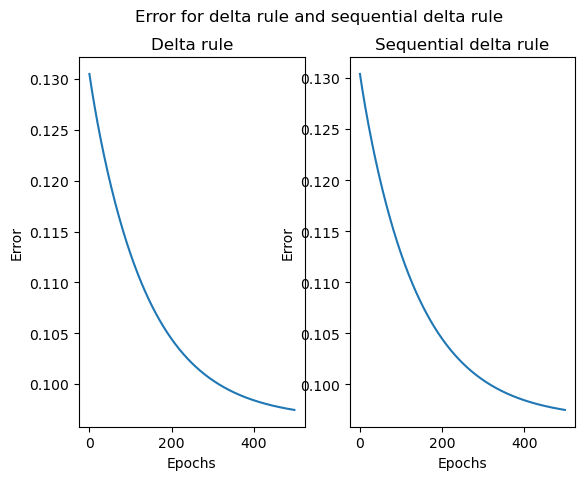

In [6]:
def sequential_delta_rule(X, T, W, eta, epochs):
    errors_list = []
    for i in range(epochs):
        tmp = []  # Initialize tmp for each epoch
        for k in range(np.shape(T)[0]):
            error = W.dot(X[:, k]) - T[k]
            tmp.append(error**2)  # Append squared error for each training example
            W = W - eta * error * X[:, k].T  # Update weights
        errors_list.append(np.mean(tmp))  # Calculate mean squared error for the epoch
    return W, errors_list

epochs = 500
updated_w_seq, error_list_seq = sequential_delta_rule(dataset, target, weights, eta, epochs)
updated_w_delta, error_list_delta = delta_rule(dataset, target, weights, eta, epochs)

# Plot the error with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Error for delta rule and sequential delta rule")
ax1.plot(error_list_delta)
ax1.set_title("Delta rule")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Error")

ax2.plot(error_list_seq)
ax2.set_title("Sequential delta rule")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Error")
plt.show()


**Question 2 Summary:** Both of them converge almost at the same speed more or less. They also seem to react the same to initial weights and learning rate.

**Question 3**:
Remove the bias, train your network with the delta rule in batch mode and test its behaviour. In what cases would the perceptron without bias converge and classify correctly all data samples? Please verify your hypothesis by adjusting data parameters, mA and mB.

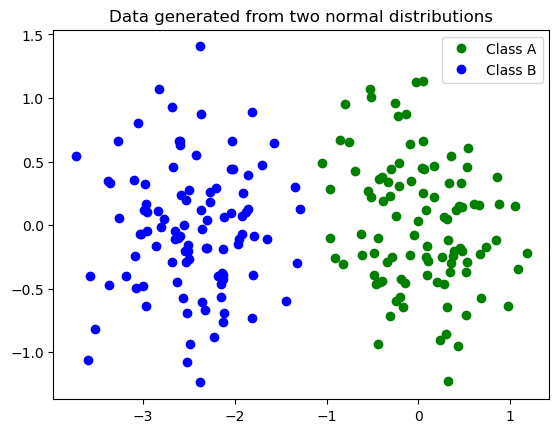

In [7]:
# Need to regenerate the data for the next part
mA = [0, 0]
mB = [-2.5, 0]

classA[0] = np.random.randn(1, 100) * sigma_A + mA[0]
classA[1] = np.random.randn(1, N) * sigma_A + mA[1]

classB[0] = np.random.randn(1, 100) * sigma_B + mB[0]
classB[1] = np.random.randn(1, N) * sigma_B + mB[1]

# Combine the data
dataset = np.concatenate((classA, classB), axis=1)
weights = np.random.randn(1, 2)  # Remove the bias
shuffled_indices = np.arange(dataset.shape[1])
np.random.shuffle(shuffled_indices)
dataset = dataset[:, shuffled_indices]
target = target[shuffled_indices]

# Plot the data
plt.plot(classA[0], classA[1], "go")
plt.plot(classB[0], classB[1], "bo")
plt.legend(["Class A", "Class B"])
plt.title("Data generated from two normal distributions")
plt.show()

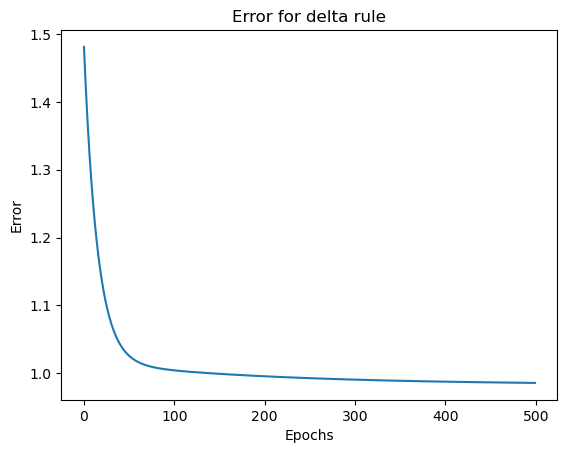

In [8]:
## Do delta rule on the newly generated data
eta = 0.00005
epochs = 500
updated_w, error_list = delta_rule(dataset, target, weights, eta, epochs)

# Plot the error
plt.plot(error_list)
plt.title("Error for delta rule")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

## Classification of samples that are not linearly separable
Studying how Perceptron deals with data samples that are not linearly separable. 

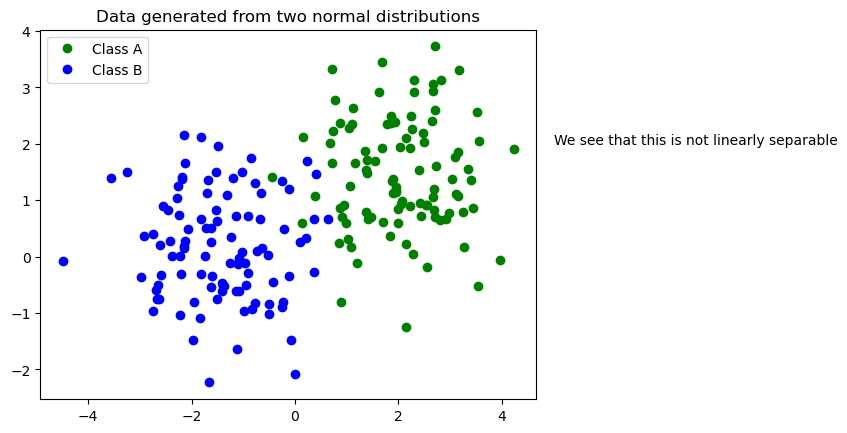

In [9]:
# Generating the data
data_size = 100
mA = [2, 1.5]
mB = [-1.5 ,0]
sigma_A = 1
sigma_B = 1

# Generate the classes
classA[0] = np.random.randn(1, data_size) * sigma_A + mA[0]
classA[1] = np.random.randn(1, data_size) * sigma_A + mA[1]

classB[0] = np.random.randn(1, data_size) * sigma_B + mB[0]
classB[1] = np.random.randn(1, data_size) * sigma_B + mB[1]

# Randomly shuffle the data
np.random.shuffle(classA)
np.random.shuffle(classB)

# Plot the data
plt.plot(classA[0], classA[1], "go")
plt.plot(classB[0], classB[1], "bo")
plt.legend(["Class A", "Class B"])
plt.title("Data generated from two normal distributions")
plt.text(5,2,"We see that this is not linearly separable")
plt.show()



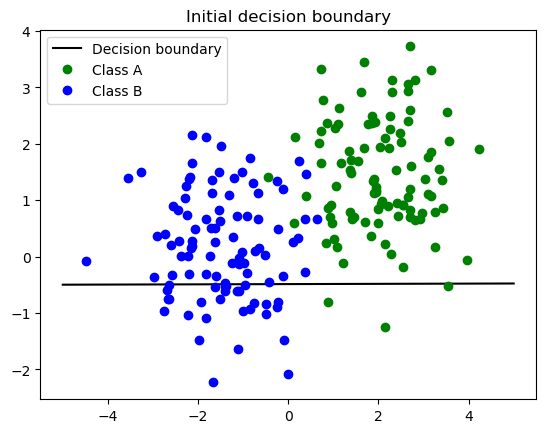

In [10]:
# Generate the dataset
dataset = np.concatenate((classA, classB), axis=1)
bias = np.ones((1, 2 * data_size))
labels = np.concatenate((np.ones(data_size), -np.ones(data_size)))
# Combine the bias and the dataset together
dataset = np.concatenate((bias, dataset), axis=0)

# Shuffle the data
shuffled_indices = np.arange(dataset.shape[1])
np.random.shuffle(shuffled_indices)
dataset = dataset[:, shuffled_indices]
labels = labels[shuffled_indices]

# Initialize the weights. 0 mean and 1 standard deviation
weights = np.random.randn(1, 3)

# Copy the weights, dataset and labels because of jupyter notebook bug. The code updates weights when it should not do that.
weights_for_delta = weights.copy()
weights_for_deltaSeq = weights.copy()

# Plot the initial decision boundary
x = np.linspace(-5, 5)
y = -(weights[0, 1] * x + weights[0, 0]) / weights[0, 2]
plt.plot(x, y, "k-")
plt.plot(classA[0], classA[1], "go")
plt.plot(classB[0], classB[1], "bo")
plt.legend(["Decision boundary", "Class A", "Class B"])
plt.title("Initial decision boundary")
plt.show()



Perceptron learning

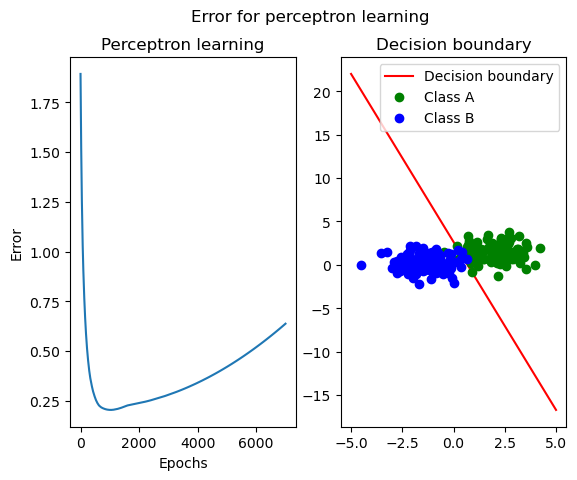

In [11]:
eta = 0.00005
epochs = 7000

weights_updated, error_list = perceptron_learning(dataset, labels, weights, eta, epochs)

# Figure with 2 subplots. One with the error and the other one with the decision boundary
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Error for perceptron learning")
ax1.plot(error_list)
ax1.set_title("Perceptron learning")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Error")

# Plot the decision boundary
x = np.linspace(-5, 5, 100)
y = -(weights_updated[0, 1] * x + weights_updated[0, 0]) / weights_updated[0, 2]
ax2.plot(x, y, "r")
ax2.plot(classA[0], classA[1], "go")
ax2.plot(classB[0], classB[1], "bo")
ax2.legend(["Decision boundary", "Class A", "Class B"])
ax2.set_title("Decision boundary")
plt.show()



Sequential Delta rule learning


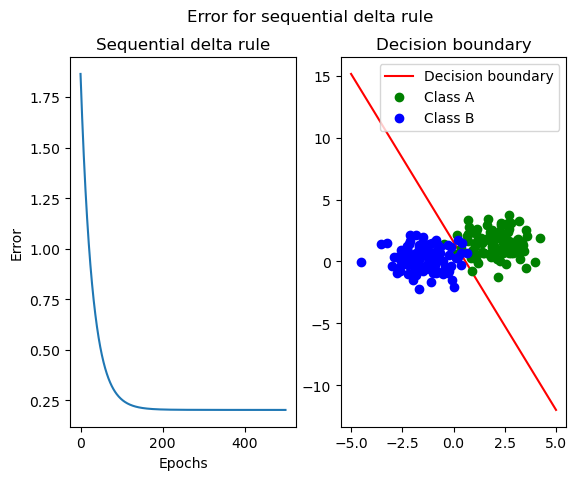

In [12]:
eta = 0.00005

seq_weights_updated, seq_error_list = sequential_delta_rule(
    dataset, labels, weights_for_deltaSeq, eta, epochs=500
)
#  Figure with 2 subplots. One with the error and the other one with the decision boundary
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Error for sequential delta rule")
ax1.plot(seq_error_list)
ax1.set_title("Sequential delta rule")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Error")

# Plot the decision boundary
x = np.linspace(-5, 5, 100)
y = -(seq_weights_updated[0, 1] * x + seq_weights_updated[0, 0]) / seq_weights_updated[0, 2]
ax2.plot(x, y, "r")
ax2.plot(classA[0], classA[1], "go")
ax2.plot(classB[0], classB[1], "bo")
ax2.legend(["Decision boundary", "Class A", "Class B"])
ax2.set_title("Decision boundary")
plt.show()


Regular delta rule learning


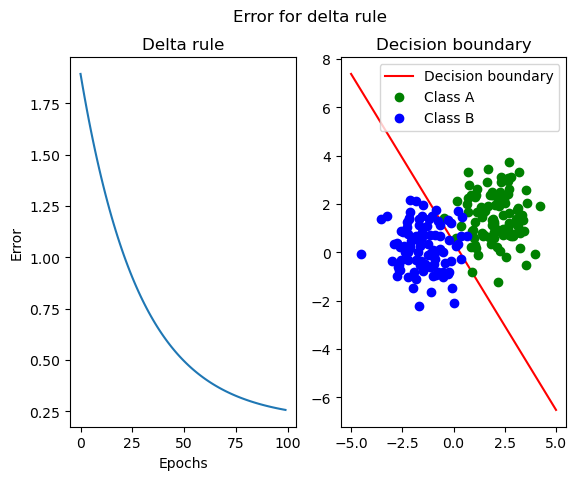

In [13]:
updated_w_delta, error_list_delta = delta_rule(dataset, labels, weights_for_delta, eta, epochs=100)

# Figure with 2 subplots. One with the error and the other one with the decision boundary
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Error for delta rule")
ax1.plot(error_list_delta)  
ax1.set_title("Delta rule")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Error")

# Plot the decision boundary
x = np.linspace(-5, 5, 100)
y = -(updated_w_delta[0, 1] * x + updated_w_delta[0, 0]) / updated_w_delta[0, 2]
ax2.plot(x, y, "r")
ax2.plot(classA[0], classA[1], "go")
ax2.plot(classB[0], classB[1], "bo")
ax2.legend(["Decision boundary", "Class A", "Class B"])
ax2.set_title("Decision boundary")
plt.show()



## Second part: 
Here we generate another dataset that is not linearly separable and we study how Perceptron deals with data samples that are not linearly separable. This one is more challenging than the previous one.


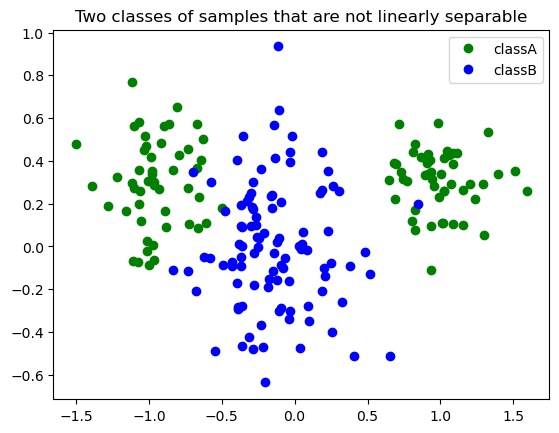

In [19]:
data_size = 100

classA = np.zeros((2, data_size))
classB = np.zeros((2, data_size))


mA = [1, 0.3]
mB = [0, -0.1]
sigmaA = 0.2
sigmaB = 0.3
classA[0] = np.concatenate(
    (
        np.random.randn(1, int(0.5 * data_size)) * sigmaA - mA[0],
        np.random.randn(1, int(0.5 * data_size)) * sigmaA + mA[0],
    ),
    axis=1,
)
classA[1] = np.random.randn(1, data_size) * sigmaA + mA[1]

classB[0] = np.random.randn(1, data_size) * sigmaB + mB[0]
classB[1] = np.random.randn(1, data_size) * sigmaB + mB[1]

np.random.shuffle(classA)
np.random.shuffle(classB)


plt.plot(classA[0], classA[1], "go")
plt.plot(classB[0], classB[1], "bo")
plt.legend(["classA", "classB"])
plt.title("Two classes of samples that are not linearly separable")
plt.show()